In [1]:
# Automated Forecasting Libraries
# Prophet—https://facebook.github.io/prophet
# NeuralProphet—https://neuralprophet.com/html/index.html
# PyTorch Forecasting—https://pytorch-forecasting.readthedocs.io/en/stable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prophet
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error
from itertools import product
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

test_df = pd.read_csv('/Users/hannahkim/Desktop/WiDS/data/test_data.csv')
train_df = pd.read_csv('/Users/hannahkim/Desktop/WiDS/data/train_data.csv')

## The data

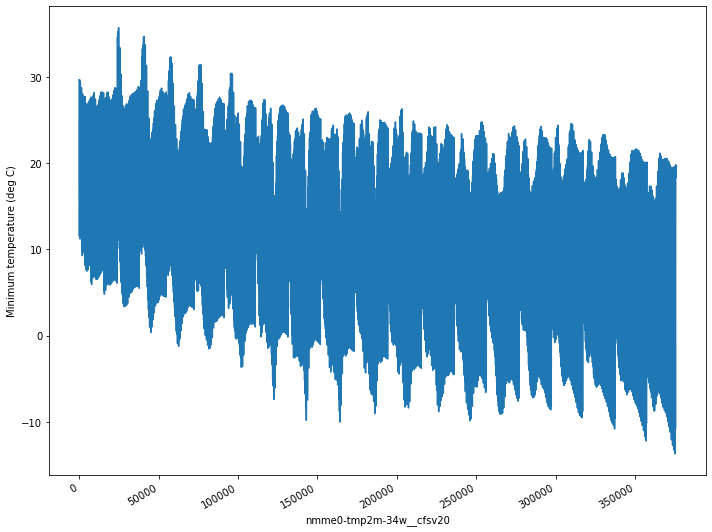

In [6]:
fig, ax = plt.subplots()
ax.plot(train_df['nmme0-tmp2m-34w__cfsv20'])
ax.set_xlabel('nmme0-tmp2m-34w__cfsv20')
ax.set_ylabel('Minimum temperature (deg C)')
fig.autofmt_xdate()
plt.tight_layout()

In [3]:
display(train_df)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,375729,1.0,0.866667,8/27/16,312.05,23.13,27.20,20.25,24.43,18.35,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,375730,1.0,0.866667,8/28/16,305.82,23.13,27.20,20.25,24.43,18.35,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,375731,1.0,0.866667,8/29/16,311.62,23.13,27.20,20.25,24.43,18.35,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,375732,1.0,0.866667,8/30/16,304.54,23.13,27.20,20.25,24.43,18.35,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22


In [37]:
# 514 unique lat lon pairings
train_df.groupby(['lat', 'lon']).size()

lat       lon     
0.000000  0.833333    731
          0.866667    731
0.045455  0.833333    731
          0.866667    731
          0.900000    731
                     ... 
1.000000  0.733333    731
          0.766667    731
          0.800000    731
          0.833333    731
          0.866667    731
Length: 514, dtype: int64

In [34]:
display(test_df)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,2022-11-03,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,2022-11-04,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,2022-11-05,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31349,407083,1.0,0.866667,2022-12-27,62.72,4.60,8.71,6.05,10.08,6.39,...,74.96,-8.49,32.39,38.82,7.42,11.75,-23.62,-0.24,-5.94,51.23
31350,407084,1.0,0.866667,2022-12-28,73.41,4.60,8.71,6.05,10.08,6.39,...,88.57,0.83,26.23,37.64,13.01,17.84,-22.05,-3.03,1.31,51.45
31351,407085,1.0,0.866667,2022-12-29,70.00,4.60,8.71,6.05,10.08,6.39,...,99.43,10.90,21.06,36.53,14.15,23.12,-25.60,-5.88,9.32,45.32
31352,407086,1.0,0.866667,2022-12-30,79.81,4.60,8.71,6.05,10.08,6.39,...,109.39,21.37,20.42,36.05,6.38,29.00,-27.06,-1.42,16.06,31.88


## Change data type

In [2]:
# The y column contains the values to be forecast, and those values must be numeric, whether float or integer.
train_df['startdate'] = pd.to_datetime(train_df['startdate'])
new_train_df = train_df[['lat', 'lon', 'startdate', 'contest-tmp2m-14d__tmp2m']]
new_train_df = new_train_df.rename(columns={'startdate': "ds", 'contest-tmp2m-14d__tmp2m': "y"})

In [29]:
# the test dataset cannot be used for this model since we need more actual and predicted values

# test_df['startdate'] = pd.to_datetime(test_df['startdate'])
# new_test_df = test_df[['startdate', 'nmme0-tmp2m-34w__cfsv20']]
# new_test_df = new_test_df.rename(columns={'startdate': "ds", 'nmme0-tmp2m-34w__cfsv20': "y"})

## Model training

In [32]:
m = Prophet()
m.fit(new_train_df)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

display(forecast)

16:48:31 - cmdstanpy - INFO - Chain [1] start processing
16:49:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-01,11.187498,16.074766,28.388086,11.187498,11.187498,10.894460,10.894460,10.894460,0.002556,0.002556,0.002556,10.891905,10.891905,10.891905,0.0,0.0,0.0,22.081958
1,2014-09-02,11.174154,15.708868,28.264400,11.174154,11.174154,10.828309,10.828309,10.828309,-0.007699,-0.007699,-0.007699,10.836008,10.836008,10.836008,0.0,0.0,0.0,22.002462
2,2014-09-03,11.160810,15.846020,27.912954,11.160810,11.160810,10.727698,10.727698,10.727698,-0.047263,-0.047263,-0.047263,10.774961,10.774961,10.774961,0.0,0.0,0.0,21.888508
3,2014-09-04,11.147466,15.294162,27.806544,11.147466,11.147466,10.735264,10.735264,10.735264,0.027014,0.027014,0.027014,10.708250,10.708250,10.708250,0.0,0.0,0.0,21.882730
4,2014-09-05,11.134122,15.428510,27.785176,11.134122,11.134122,10.606825,10.606825,10.606825,-0.028620,-0.028620,-0.028620,10.635445,10.635445,10.635445,0.0,0.0,0.0,21.740947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2018-08-27,11.212370,-12.902346,56.370633,-23.266666,44.399639,11.118134,11.118134,11.118134,0.002556,0.002556,0.002556,11.115578,11.115578,11.115578,0.0,0.0,0.0,22.330504
1457,2018-08-28,11.212388,-11.521515,56.917267,-23.326184,44.459260,11.068433,11.068433,11.068433,-0.007699,-0.007699,-0.007699,11.076132,11.076132,11.076132,0.0,0.0,0.0,22.280821
1458,2018-08-29,11.212407,-14.577823,56.045063,-23.385702,44.524072,10.987426,10.987426,10.987426,-0.047263,-0.047263,-0.047263,11.034688,11.034688,11.034688,0.0,0.0,0.0,22.199832
1459,2018-08-30,11.212425,-13.562645,56.592436,-23.445220,44.562643,11.017620,11.017620,11.017620,0.027014,0.027014,0.027014,10.990606,10.990606,10.990606,0.0,0.0,0.0,22.230045
